# Integração Numérica

Integração numérica é um campo muito importante na análise numérica. É aplicado em situações onde o integrando é uma função muito complexa, sendo impossível ou muito difícil obter uma forma fechada para a integral. Em alguns casos, a função que descreve o integrando não pode ser obtida analiticamente e portanto faz-se necessário o uso de uma técnica de interpolação, por exemplo. Neste material serão analisados três casos em que a integral pode ser resolvida analiticamente, mas utilizando métodos mais refinados, enquanto que a solução numérica será obtida em poucas linhas de código.

## Teoria

Existem diversos algoritmos para a resolução numérica de integrais. **XNLPY** usa um método de integração adaptativa que faz uso da quadratura de Gauss-Legendre para aproximar o valor da integral dados certos parâmetros. De forma mais clara, dada uma função $f$, integrável num intervalo $(a,b)$, e $n$ pontos de Gauss-Legendre, então a integral pode ser aproximada pela expressão abaixo.

$$ \displaystyle
\int_{a}^{b}f(x)dx \approx \frac{b-a}{2}\sum_{i=1}^{n}w_i f\left(\frac{b-a}{2}x_i + \frac{b+a}{2}\right)
$$

O algoritmo adaptativo funciona subdividindo o intervalo principal $(a,b)$ em intervalos menores e aplica a aproximação anterior em cada um desses subintervalos, sendo $w_i$ e $x_i$ o i-ésimo peso e a i-ésima raiz do polinômio de Legendre de grau $n$, respectivamente. Quanto mais complicado for o comportamento da função em um intervalo, mais subdivisões serão feitas pelo algoritmo adaptativo, o que eleva consideravelmente a quantidade de operações computacionais. Existem dois parâmetros que controlam esse comportamento: tolerância e profundidade. 

A tolerância informada para a função integral é a tolerância de cada subintervalo enquanto a profundidade é o número máximo de chamadas recursivas que a função pode fazer. O algoritmo é encerrado quando a tolerância é atingida por um subintervalo ou quando a profundidade especificada é atingida. Vale ressaltar que uma tolerância muito pequena e uma profundidade muito grande podem fazer o algoritmo "travar". Também é interessante notar que a quantidade de pontos não é o único fator que influencia na aproximação. Algumas funções possuem comportamento muito irregular em certos intervalos e portanto usar menos pontos pode fazer com que a aproximação em intervalos pequenos seja melhor.

## Prática

Em primeiro lugar, importe os módulos xnlpy e matplotlib. Desse último importaremos o pyplot para fazer análises gráficas quanto ao erro retornado pela função integral. Além disso, criaremos a função plot_integral_analysis que irá plotar o erro retornado em função da quantidade de pontos utilizados na quadratura.

In [1]:
import xnlpy as xp
import matplotlib.pyplot as plt

def plot_integral_analysis(number, true_val, begin, func, a, b, **kwargs):
    points = kwargs.get('points')
    tolerance = kwargs.get('tolerance')
    depth = kwargs.get('depth')
    if (not points): points = 3
    if (not tolerance): tolerance = 1e-9
    if (not depth): depth = 10
    
    est_errors = [None]*(points-begin+1)
    tr_errors = [None]*(points-begin+1)
    for i in range(begin,points+1):
        result, error = xp.integral(func, a, b, points=i, tolerance=tolerance, depth=depth)
        est_errors[i-begin] = error
        tr_errors[i-begin] = abs(true_val - result)
    
    pts = list(range(begin,points+1))

    plt.figure(number)

    #ploting
    plt.plot(pts, est_errors, label = "Estimated Error")
    plt.plot(pts, tr_errors, label = "True Error")
    
    plt.xlabel('Points')
    plt.ylabel('Error')

    plt.title('Performance Analysis')
    plt.legend()

    plt.show()

### Primeiro Exemplo

Calcule o valor da integral abaixo.

$$ \displaystyle
\int_{-1}^{1}\frac{1}{x}\sqrt{\frac{1+x}{1-x}}\ln{\left(\frac{2x^2 + 2x + 1}{2x^2 - 2x + 1}\right)}dx
$$

Resolver essa integral analiticamente é uma tarefa muito desafiadora, como você pode ver [aqui](http://residuetheorem.com/2013/11/16/a-crazy-ass-integral-the-evaluation-of-which-got-a-lot-of-love-at-math-se/). Perceba a habilidade requerida para entender os passos da solução. No mundo real, a solução analítica de integrais raramente é desejada, sendo o seu valor numérico o suficiente para o engenheiro. Neste caso em particular, a substituição $x = \cos\theta$ é interessante pois a integral torna-se:

$$ \displaystyle
\int_{0}^{\pi}\frac{\tan{(\theta)}}{\tan{(\theta/2)}}\ln{\left(\frac{2\cos^2(\theta) + 2\cos(\theta) + 1}{2\cos^2(\theta) - 2\cos(\theta) + 1}\right)}d\theta.
$$

O computador calcula valores pequenos de $\tan\theta$ muito mais facilmente do que raízes quadradas. Voltando para o python, primeiro declaramos o valor analítico (valor real), o intervalo de integração e o integrando. Depois aplicamos a função integral com 15 pontos. Os demais parâmetros (tolerância e profundidade) possuem valores padrão 1e-9 e 10, respectivamente. Por fim, aplicamos a função plot_integral_analysis para avaliar o comportamento do erro dados os parâmetros especificados. Perceba que para essa integral quanto maior o número de pontos, mais o erro estimado se aproxima do erro real.

###Integrating the first function...

Result: 8.372211626601276 
Est. Error: 4.968081501743882e-10 
True Error: 1.7763568394002505e-15


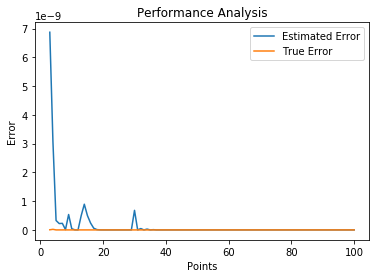

In [2]:
############# Function 1 #############

print("###Integrating the first function...\n")

phi = (1 + xp.sqrt(5)) / 2
acot = lambda x: xp.pi/2 - xp.atan(x)
true_res = 4 * xp.pi * acot(xp.sqrt(phi))

a = 0
b = xp.pi

func = lambda x: xp.tan(x) / xp.tan(x/2) * xp.log((2*xp.cos(x)**2 + 2*xp.cos(x) + 1) / (2*xp.cos(x)**2 - 2*xp.cos(x) + 1))

[result, error] = xp.integral(func, a, b, points=15)

print("Result:", result,"\nEst. Error:", error,"\nTrue Error:", result - true_res)

plot_integral_analysis(1, true_res, 3, func, a, b, points=100)

### Segundo Exemplo

Neste exemplo resolveremos a [integral](https://math.stackexchange.com/questions/464769/how-to-prove-int-01-tan-1-left-frac-tanh-1x-tan-1x-pi-tanh-1) 
$\DeclareMathOperator\arctanh{arctanh}$
$$ \displaystyle
\int_{0}^{1}\frac{1}{x}\arctan\left(\frac{\arctanh(x) - \arctan(x)}{\pi +\arctanh(x) - \arctan(x)}\right)dx.
$$

Seguimos os mesmos passos do primeiro exemplo, mas dessa vez o número de pontos utilizados foi reduzido para 10, enquanto a tolerância e a profundidade foram especificadas como 1e-15 e 50, respectivamente.


###Integrating the second function...

Result: 0.08247396606843829 
Est. Error: 5.320111574872283e-16 
True Error: -4.3021142204224816e-16


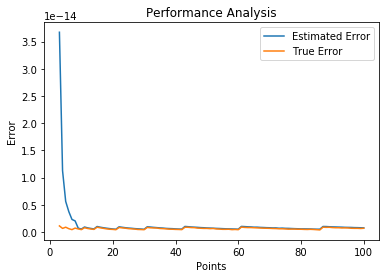

In [3]:
############# Function 2 #############

print("\n###Integrating the second function...\n")

true_res = (xp.pi / 8) * xp.log(xp.pi**2 / 8)

a = 0
b = 1

func = lambda x: xp.atan( (xp.atanh(x) - xp.atan(x)) / (xp.pi + xp.atanh(x) - xp.atan(x)) ) / x

[result, error] = xp.integral(func, a, b, points=10, tolerance=1e-15, depth=50)

print("Result:", result,"\nEst. Error:", error,"\nTrue Error:", result - true_res)

plot_integral_analysis(2, true_res, 3, func, a, b, points=100, tolerance=1e-15, depth=50)

### Terceiro Exemplo

Finalmente iremos atacar uma integral polinomial imprópria (com [solução analítica](https://math.stackexchange.com/questions/266181/a-nasty-integral-of-a-rational-function)):

$$ \displaystyle
\int_{0}^{\infty}\frac{x^8 - 4x^6 + 9x^4 - 5x^2 + 1}{x^{12} - 10x^{10} + 37x^8 - 42x^6 + 26x^4 - 8x^2 + 1}dx.
$$

O módulo xnlpy possui a macro infinity que é muito útil para essa situação. Novamente, tomamos os mesmos passos dos exemplos anteriores, mas dessa vez não foi necessário aumentar a profundidade do algoritmo adaptativo. Perceba que agora o comportamento do erro é um pouco mais irregular.


###Integrating the third function...

Result: 1.5707963267948968 
Est. Error: 6.557254739192331e-16 
True Error: 2.220446049250313e-16


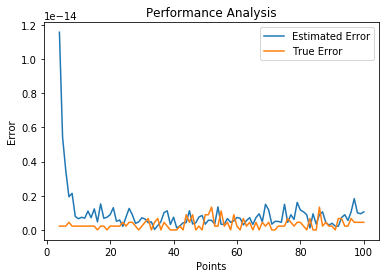

In [4]:
############# Function 3 #############

print("\n###Integrating the third function...\n")

true_res = xp.pi / 2

a = 0
b = xp.inf

func = lambda x: (x**8 - 4*x**6 + 9*x**4 - 5*x**2 + 1) / (x**12 - 10*x**10 + 37*x**8 - 42*x**6 + 26*x**4 - 8*x**2 + 1)

[result, error] = xp.integral(func, a, b, points=10, tolerance=1e-15)

print("Result:", result,"\nEst. Error:", error,"\nTrue Error:", result - true_res)

plot_integral_analysis(3, true_res, 4, func, a, b, points=100, tolerance=1e-15)

## Indo Além

Tente aplicar a função integral a outras funções. Veja, por exemplo, o que acontece se o comportamento do integrando em um certo intervalo for muito oscilatório. Experimente. Esse é um exercício muito bom e é suficiente para entender a integração numérica. Boa prática!